# Import Libraries

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib seaborn 

In [3]:
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
schemes_df = pd.read_csv("ap_schemes.csv")
schemes_df.columns = schemes_df.columns.str.strip().str.lower()

scholarships_df = pd.read_csv("ap_scholarships.csv")
scholarships_df.columns = scholarships_df.columns.str.strip().str.lower()


# Loading Schemes Dataset

In [20]:
schemes = pd.read_csv("ap_schemes.csv")
schemes.head()

,scheme_name,eligible_caste,gender,education,occupation,min_age,max_age,max_income,apply_link
0,Talliki Vandanam (Amma Vodi),"OC,BC,SC,ST,Minority","Male,Female","School,Intermediate,Diploma",Student,6,18,144000,https://navasakam.ap.gov.in
1,Dr NTR Vaidya Seva,"OC,BC,SC,ST,Minority","Male,Female",ALL,ALL,1,120,500000,https://drntrvaidyaseva.ap.gov.in
2,Annadata Sukhibhava Scheme,"OC,BC,SC,ST,Minority","Male,Female",ALL,Farmer,18,120,20000,https://annadathasukhibhava.ap.gov.in
3,AP Housing (Mana illu Mana gouravam),"OBC,SC,ST,BC,Minority",Female,ALL,Worker,18,120,300000,https://housing.ap.gov.in
4,NTR Bharosa Pension Scheme (Senior),"OC,BC,SC,ST,Minority","Male,Female",NONE,Senior,60,120,20000,https://sspensions.ap.gov.in


In [21]:
scholarships = pd.read_csv("ap_scholarships.csv")
scholarships.head()


,scholarship_name,eligible_caste,gender,education,occupation,min_age,max_age,max_income,min_marks,apply_link
0,Post Matric Scholarship – Tuition Fee (Jnanabh...,"OC,BC,SC,ST,Minority","Male,Female","BTech,Degree",Student,18,22,120000,75,https://jnanabhumi.ap.gov.in
1,Post Matric Scholarship – Maintenance Fee (Jna...,"OC,BC,SC,ST,Minority","Male,Female","BTech,Degree",Student,18,22,120000,75,https://jnanabhumi.ap.gov.in
2,Pre Matric Scholarship,"OBC,SC,ST,Minority","Male,Female",School,Student,6,16,200000,40,https://jnanabhumi.ap.gov.in
3,Minority Scholarship,Minority,"Male,Female",Degree,Student,18,120,250000,50,https://scholarships.gov.in
4,AICTE Pragati Scholarship,"OBC,SC,ST",Female,"B.E,BTech,Diploma",Student,18,22,800000,60,https://www.aicte-india.org/schemes/students-d...


In [22]:
print("Schemes Info")
schemes.info()

Schemes Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   scheme_name     9 non-null      object
 1   eligible_caste  9 non-null      object
 2   gender          9 non-null      object
 3   education       9 non-null      object
 4   occupation      9 non-null      object
 5   min_age         9 non-null      int64 
 6   max_age         9 non-null      int64 
 7   max_income      9 non-null      int64 
 8   apply_link      9 non-null      object
dtypes: int64(3), object(6)
memory usage: 776.0+ bytes


In [23]:
print("\nScholarships Info")
scholarships.info()


Scholarships Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   scholarship_name  7 non-null      object
 1   eligible_caste    7 non-null      object
 2   gender            7 non-null      object
 3   education         7 non-null      object
 4   occupation        7 non-null      object
 5   min_age           7 non-null      int64 
 6   max_age           7 non-null      int64 
 7   max_income        7 non-null      int64 
 8   min_marks         7 non-null      int64 
 9   apply_link        7 non-null      object
dtypes: int64(4), object(6)
memory usage: 688.0+ bytes


# Checking missing values

In [24]:
print(schemes.isnull().sum())

scheme_name       0
eligible_caste    0
gender            0
education         0
occupation        0
min_age           0
max_age           0
max_income        0
apply_link        0
dtype: int64


In [25]:
print(scholarships.isnull().sum())

scholarship_name    0
eligible_caste      0
gender              0
education           0
occupation          0
min_age             0
max_age             0
max_income          0
min_marks           0
apply_link          0
dtype: int64


# AP Schemes

# Expand Schemes Dataset & Target Column

In [26]:
# Expand dataset
schemes_expanded = pd.concat([schemes] * 50, ignore_index=True)

# Synthetic user data
np.random.seed(42)
schemes_expanded["user_age"] = np.random.randint(18, 65, size=len(schemes_expanded))
schemes_expanded["user_income"] = np.random.randint(50000, 600000, size=len(schemes_expanded))

# Eligibility label
schemes_expanded["eligible"] = np.where(
    (schemes_expanded["user_age"] >= schemes_expanded["min_age"]) &
    (schemes_expanded["user_age"] <= schemes_expanded["max_age"]) &
    (schemes_expanded["user_income"] <= schemes_expanded["max_income"]),
    1, 0
)

schemes_expanded["eligible"].value_counts()

eligible
0    349
1    101
Name: count, dtype: int64

# Eligibility Distribution

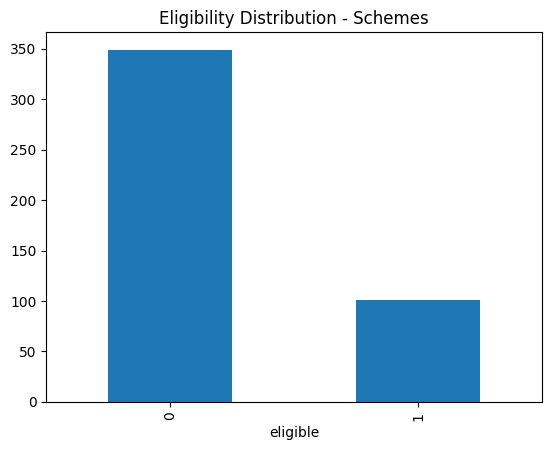

In [27]:
plt.figure()
schemes_expanded["eligible"].value_counts().plot(kind="bar")
plt.title("Eligibility Distribution - Schemes")
plt.show()

# Encode Categorical Columns (Schemes)

In [28]:
encoder = LabelEncoder()

for col in schemes_expanded.select_dtypes(include="object").columns:
    schemes_expanded[col] = encoder.fit_transform(schemes_expanded[col])

# Feature & Target Split (Schemes)

In [29]:
X_sc = schemes_expanded.drop(["eligible", "apply_link"], axis=1)
y_sc = schemes_expanded["eligible"]

# Train-Test Split (Schemes)

In [30]:
X_sc_train, X_sc_test, y_sc_train, y_sc_test = train_test_split(
    X_sc, y_sc, test_size=0.25, random_state=42, stratify=y_sc
)

# Train ML Models

In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Test ML Models

In [32]:
for name, model in models.items():
    model.fit(X_sc_train, y_sc_train)
    preds = model.predict(X_sc_test)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_sc_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_sc_test, preds))
    print("Classification Report:\n", classification_report(y_sc_test, preds))


Logistic Regression
Accuracy: 0.9557522123893806
Confusion Matrix:
 [[85  3]
 [ 2 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        88
           1       0.88      0.92      0.90        25

    accuracy                           0.96       113
   macro avg       0.93      0.94      0.94       113
weighted avg       0.96      0.96      0.96       113


Decision Tree
Accuracy: 0.9734513274336283
Confusion Matrix:
 [[86  2]
 [ 1 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.92      0.96      0.94        25

    accuracy                           0.97       113
   macro avg       0.96      0.97      0.96       113
weighted avg       0.97      0.97      0.97       113


Random Forest
Accuracy: 0.9823008849557522
Confusion Matrix:
 [[87  1]
 [ 1 24]]
Classification Report:
               precisio

c:\Users\prava\anaconda3\envs\benefitbot\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# AP Scholarships

# Expand Scholarships Dataset & Create Target

In [33]:
scholarships_expanded = pd.concat([scholarships] * 50, ignore_index=True)

# Synthetic user income & marks
np.random.seed(42)
scholarships_expanded["user_income"] = np.random.randint(50000, 800000, size=len(scholarships_expanded))
scholarships_expanded["user_marks"] = np.random.randint(35, 100, size=len(scholarships_expanded))

# Eligibility label
scholarships_expanded["eligible"] = np.where(
    (scholarships_expanded["user_marks"] >= scholarships_expanded["min_marks"]) &
    (scholarships_expanded["user_income"] <= scholarships_expanded["max_income"]),
    1, 0
)

scholarships_expanded["eligible"].value_counts()

eligible
0    256
1     94
Name: count, dtype: int64

# Eligibility Distribution (Scholarships)

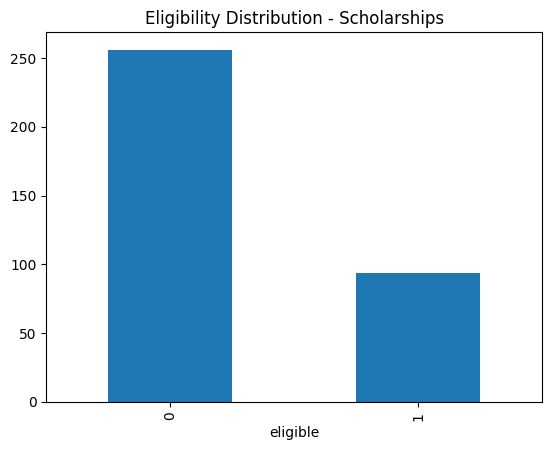

In [34]:
plt.figure()
scholarships_expanded["eligible"].value_counts().plot(kind="bar")
plt.title("Eligibility Distribution - Scholarships")
plt.show()

# Encode Categorical Columns (Scholarships)

In [35]:
for col in scholarships_expanded.select_dtypes(include="object").columns:
    scholarships_expanded[col] = encoder.fit_transform(scholarships_expanded[col])

# Feature & Target Split (Scholarships)

In [36]:
X_sch = scholarships_expanded.drop(["eligible", "apply_link"], axis=1)
y_sch = scholarships_expanded["eligible"]

# Train-Test Split (Scholarships)

In [37]:
X_sch_train, X_sch_test, y_sch_train, y_sch_test = train_test_split(
    X_sch, y_sch, test_size=0.25, random_state=42, stratify=y_sch
)

# Train & Test ML Models

In [38]:
print("🎓 AP SCHOLARSHIPS MODEL RESULTS")

for name, model in models.items():
    model.fit(X_sch_train, y_sch_train)
    preds = model.predict(X_sch_test)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_sch_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_sch_test, preds))
    print("Classification Report:\n", classification_report(y_sch_test, preds))

🎓 AP SCHOLARSHIPS MODEL RESULTS

Logistic Regression
Accuracy: 0.7954545454545454
Confusion Matrix:
 [[55  9]
 [ 9 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        64
           1       0.62      0.62      0.62        24

    accuracy                           0.80        88
   macro avg       0.74      0.74      0.74        88
weighted avg       0.80      0.80      0.80        88


Decision Tree
Accuracy: 0.9431818181818182
Confusion Matrix:
 [[63  1]
 [ 4 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        64
           1       0.95      0.83      0.89        24

    accuracy                           0.94        88
   macro avg       0.95      0.91      0.93        88
weighted avg       0.94      0.94      0.94        88


Random Forest
Accuracy: 0.9431818181818182
Confusion Matrix:
 [[64  0]
 [ 5 19]]
Classification

# Train Final Best Model (Schemes)

In [39]:
best_scheme_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

best_scheme_model.fit(X_sc, y_sc)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Train Final Best Model (Scholarships)

In [40]:
best_scholarship_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

best_scholarship_model.fit(X_sch, y_sch)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Saving the Models

In [41]:
import joblib

joblib.dump(best_scheme_model, "best_scheme_model.pkl")
joblib.dump(best_scholarship_model, "best_scholarship_model.pkl")

print("Models saved successfully!")

Models saved successfully!


# Save Model Parameters & Feature Names

In [42]:
# Save parameters
scheme_model_params = {
    "model_type": "RandomForestClassifier",
    "parameters": best_scheme_model.get_params(),
    "features": list(X_sc.columns)
}

scholarship_model_params = {
    "model_type": "RandomForestClassifier",
    "parameters": best_scholarship_model.get_params(),
    "features": list(X_sch.columns)
}

joblib.dump(scheme_model_params, "scheme_model_params.pkl")
joblib.dump(scholarship_model_params, "scholarship_model_params.pkl")

print("Model parameters saved!")

Model parameters saved!


# Load and Test Saved Model

In [43]:
# Load models
loaded_scheme_model = joblib.load("best_scheme_model.pkl")
loaded_scholarship_model = joblib.load("best_scholarship_model.pkl")

# Test with one sample
sample_scheme = X_sc.iloc[[0]]
sample_scholarship = X_sch.iloc[[0]]

print("Scheme Prediction:", loaded_scheme_model.predict(sample_scheme))
print("Scholarship Prediction:", loaded_scholarship_model.predict(sample_scholarship))

Scheme Prediction: [0]
Scholarship Prediction: [0]
